# Aufgabe 32

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pp

## a) Übergangsmatrix

In [2]:
P = np.matrix([[0.5, 0.5, 0.0],
               [0.0, 0.3, 0.7],
               [0.4, 0.0, 0.6]])

assert np.all(P.sum(axis=1) == 1.0)  # stoch. Matrix

## b) Zustandsverteilung

In [3]:
pn = np.matrix([0.5, 0.25, 0.25]).T  # Verteilung zum Zeitpunkt n
pn2T = pn.T * P ** 2                 # Verteilung zwei Schritte weiter
pn2T.tolist()[0]

[0.305, 0.2725, 0.4225]

In [4]:
1 - pn2T[0, 1]  # nicht Zustand 2 (hier index 1)

0.72750000000000004

## d) Aufenthaltswahrscheinlichkeiten $\vec{\Pi}$

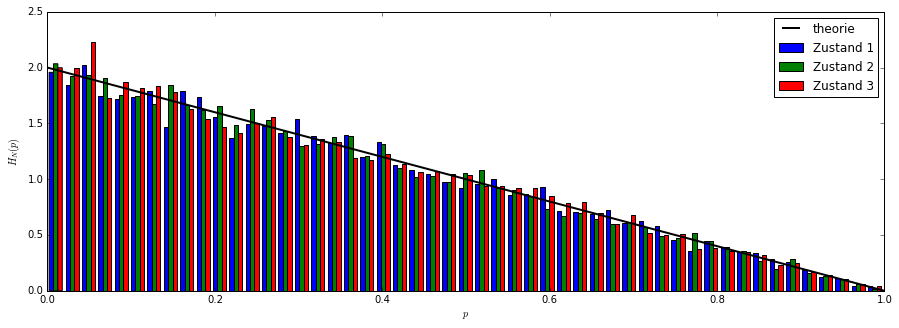

In [5]:
N = 10000
p1 = 1 - np.sqrt(1 - np.random.sample(N))  # Dichte: 2(1-p1), 0<p1<1
p2 = (1 - p1) * np.random.sample(N)        # bed Dichte: 1/(1-p1), 0<p2<1-p1
p3 = 1 - p1 - p2                           # determistisch, wenn p1, p2 gegeben.

# N zufällige Anfangsverteilungen
p0 = np.vstack((p1, p2, p3)).T
assert np.all(p0 >= 0) and np.all(abs(p0.sum(1) - 1) < 1e-3)  # stoch. Vektoren

pp.figure(figsize=(15, 5))
pp.hist(p0, bins=51, normed=True)
pt = np.linspace(0, 1, 51); pp.plot(pt, 2 * (1 - pt), 'k', linewidth=2)
pp.xlabel(r'$p$'); pp.ylabel(r'$H_N(p)$'); 
pp.legend(['theorie'] + ['Zustand {}'.format(i) for i in (1,2,3)]);

Pi  = [0.3373, 0.241, 0.4217].T


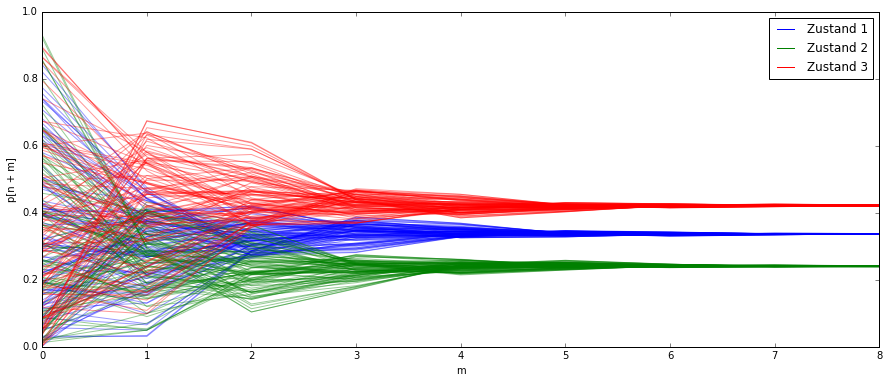

In [7]:
M, N = 20, 100  # Schritte, zuf. Anfänge
p = np.empty((M, N, 3)); p[0] = p0[:N]

for i in range(1, M):
    p[i] = p[i-1] @ P  # Zustandsverteilung für M Schritte rekursiv berechnen

print('Pi  = {}.T'.format(p[-1].mean(0).round(4).tolist()))
    
pp.figure(figsize=(15, 6))
pp.plot(0, 'b'); pp.plot(0, 'g'); pp.plot(0, 'r')  # dummys für Legende
for i, c in enumerate(('b', 'g', 'r')):
    pp.plot(p[..., i], color=c, alpha=0.4);    
pp.xlabel('m'); pp.ylabel('p[n + m]'); pp.xlim(0, 8); pp.ylim(0, 1)
pp.legend(['Zustand {}'.format(i) for i in (1,2,3)]);